In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps#float32
from sklearn.decomposition import KernelPCA
%matplotlib inline

In [2]:
# Load spike data
spike_data = np.load('../data/data_smooth_W20L50k.npy')
length = 10000
spike_data_t = spike_data[:,0:length]
print(np.shape(spike_data))

# short time span
t = np.shape(spike_data_t)[1]
n = np.shape(spike_data)[0]

(336, 10000)


In [3]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(spike_data_t)) #scaling the data
print(scaled_data.shape)
scaled=pd.DataFrame.to_numpy(scaled_data)

(336, 10000)


In [4]:
r=336
Kpca = KernelPCA(n_components=r, kernel='linear',eigen_solver='auto',remove_zero_eig='True',fit_inverse_transform='True')
data_Kpca = Kpca.fit_transform(scaled_data)
#print(data_Kpca)
print(data_Kpca.shape)
e = Kpca.eigenvalues_    # lam
s = Kpca.eigenvectors_ # S

print(e.shape)
#print(e)
print(s.shape)
#print(s)
E = np.diag(e)
dc = Kpca.dual_coef_
#print(dc)
#print(dc.shape)

(336, 289)
(289,)
(336, 289)


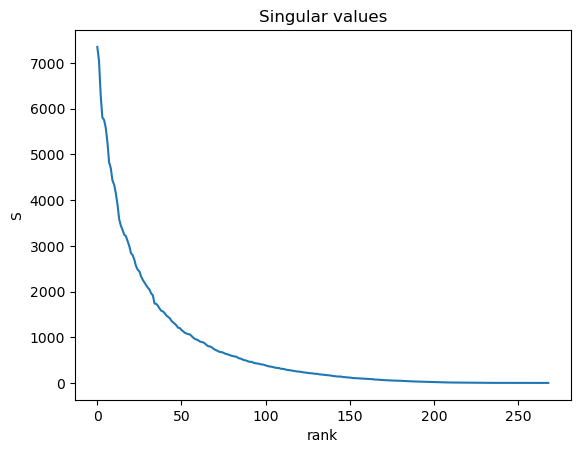

In [5]:
fig, ax = plt.subplots()
ax.plot(e[20:])

ax.set(xlabel='rank', ylabel='S',
       title='Singular values')
plt.show()

dims = e.shape[0]

In [6]:
#spike__projected = np.linalg.inv(E)@s.T@scaled_data
spike__projected = s.T@scaled_data
spike_projected = pd.DataFrame.to_numpy(spike__projected)


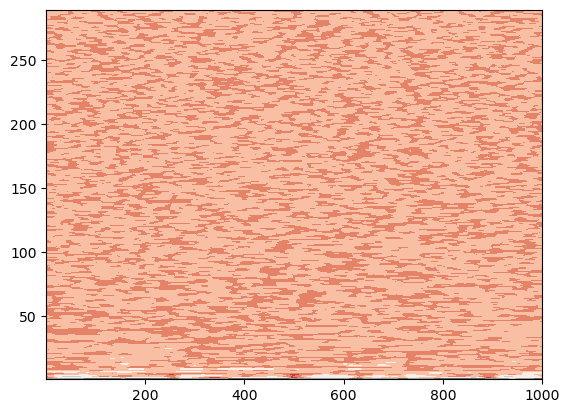

In [7]:
#dims=166
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, dims, dims)
#print(time.shape)
#print(time)
#print(neurons.shape)
#print(neurons)
T, N = np.meshgrid(time, neurons)


plt.contourf(T, N, spike_projected[:dims,:1000], 10, cmap='RdGy')

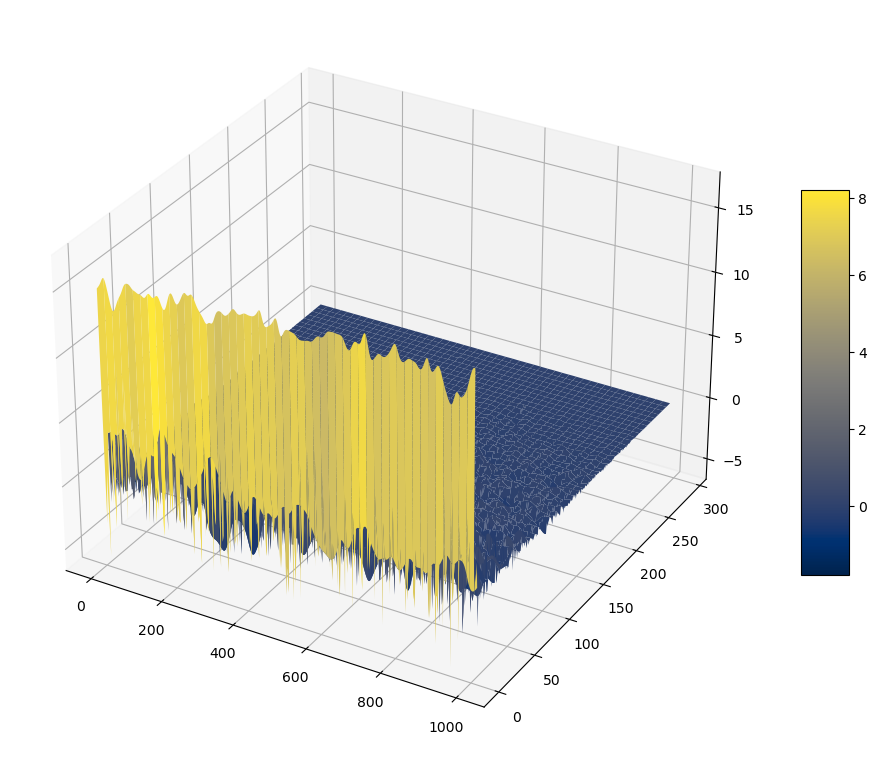

In [8]:
#%matplotlib qt
#dims=166
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, dims, dims)
T, N = np.meshgrid(time, neurons)

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(T, N, spike_projected[0:dims,:1000], cmap = plt.cm.cividis)
# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [9]:
# reconstruct data
rank = 20
s_r = s[:,:rank]
spike__reconstructed = s_r@s_r.T@scaled_data
spike_reconstructed = pd.DataFrame.to_numpy(spike__reconstructed)

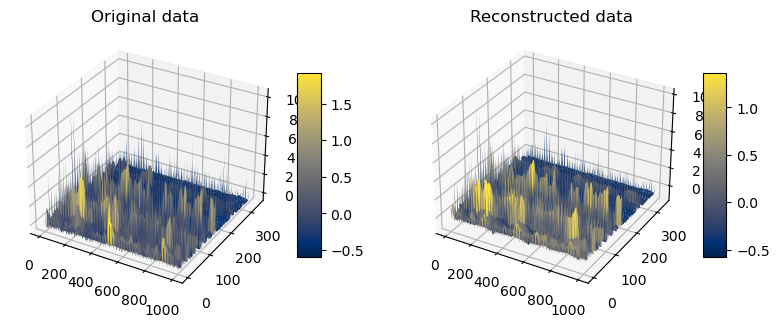

In [10]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title('Original data')
time = np.linspace(1, 1000, 1000)
neurons = np.linspace(1, 336, 336)


T, N = np.meshgrid(time, neurons)
#surf = ax.plot_surface(T, N, spike_data[:,0:1000], cmap = plt.cm.cividis)
surf = ax.plot_surface(T, N, scaled[:,0:1000], cmap = plt.cm.cividis)

fig.colorbar(surf, shrink=0.5, aspect=8)

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title('Reconstructed data')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
surf = ax.plot_surface(T, N, spike_reconstructed[:,:1000], cmap = plt.cm.cividis)
fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [11]:
print(spike_projected.shape)

(289, 10000)


In [12]:
np.save('../data/KPCA_proj_10k', spike_projected)
np.save('../data/KPCA_eigenvector', s)